In [82]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

#Combine Data
combined_data = pd.merge(mouse_df, clinical_df, on='Mouse ID', how = 'left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [83]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_vol = combined_data.loc[:, ["Drug","Timepoint", "Tumor Volume (mm3)"]]

# Preview DataFrame
mean_vol

mean_vol = mean_vol.loc[(mean_vol["Drug"] == "Capomulin")| 
                                    (mean_vol["Drug"] == "Infubinol")|
                                    (mean_vol["Drug"] == "Ketapril")|
                                    (mean_vol["Drug"] == "Placebo")]
mean_vol


,Drug,Timepoint,Tumor Volume (mm3)
380,Ketapril,0,45.000000
381,Ketapril,5,47.864440
382,Ketapril,10,51.236606
383,Ketapril,0,45.000000
384,Ketapril,5,45.824881
...,...,...,...
1901,Placebo,0,45.000000
1902,Placebo,5,46.588820
1903,Placebo,10,48.018788
1904,Placebo,15,51.161138


In [84]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stan = mean_vol['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
stan_df = pd.DataFrame({'Drug':drug,
                       'Timepoint':Timepoint,
                       'Tumor Volume (mm3)':stan})
stan_df = stan_df.reset_index(drop=True)
# Preview DataFrame
stan_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Placebo,0,0.332236
1,Placebo,5,0.332236
2,Placebo,10,0.332236
3,Placebo,15,0.332236
4,Placebo,20,0.332236


In [85]:
# Minor Data Munging to Re-Format the Data Frames
mean_piv = pd.pivot_table(mean_vol, values='Tumor Volume (mm3)', 
                                     index=['Timepoint'], columns=["Drug"])
# Preview that Reformatting worked
mean_piv

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


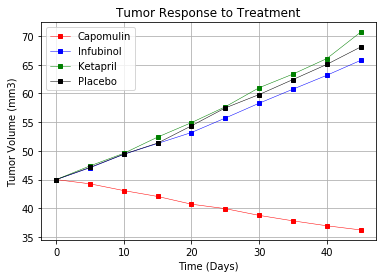

In [86]:
# Generate the Plot (with Error Bars)
Timepoints = mean_piv.index.values
Capomulin, = plt.plot(Timepoints, mean_piv.Capomulin, color='red', label='Capomulin', 
                      marker='s', markersize=4, linewidth=.5)
Infubinol, = plt.plot(Timepoints, mean_piv.Infubinol, color='blue', label='Infubinol', 
                      marker='s', markersize=4, linewidth=.5)
Ketapril, = plt.plot(Timepoints, mean_piv.Ketapril, color='green', label='Ketapril', 
                      marker='s', markersize=4, linewidth=.5)

Placebo, = plt.plot(Timepoints, mean_piv.Placebo, color='black', label='Placebo', 
                      marker='s', markersize=4, linewidth=.5)
# Save the Figure
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend()
plt.show()

In [87]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [88]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_df = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
avg_met = met_df.mean()

# Convert to DataFrame
met_resp_df = pd.DataFrame(avg_met)
# Preview DataFrame
met_resp_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [89]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_s_err= met_df.sem()

# Convert to DataFrame
met_s_err_df = pd.DataFrame(met_s_err)
# Preview DataFrame
met_s_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [90]:
# Minor Data Munging to Re-Format the Data Frames
met_resp_df = met_resp_df.reset_index()
pivot_met_sem = met_resp_df.pivot(index='Timepoint',columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
pivot_met_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


No handles with labels found to put in legend.


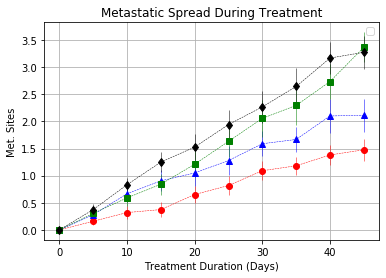

In [91]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    ste = met_s_err[drug]
    met_treatment_plt = plt.errorbar(pivot_met_sem.index, pivot_met_sem[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
# Save the Figure
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)